# ENGR-6350-Intro-To-FEA-Homework-1

## 1. Lookup Function for Calculating Shape Function Values

## 2. Lookup Function for Calculating Value for Derivative of Shape Functions



=== Shape Functions (N1D) ===
xi = -1.0, 2-node: [1.0, 0.0], 3-node: [1.0, 0, 0.0]
xi =  0.0, 2-node: [0.5, 0.5], 3-node: [0.0, 1, 0.0]
xi =  1.0, 2-node: [0.0, 1.0], 3-node: [0.0, 0, 1.0]

=== Derivatives (B1D) ===
xi = -1.0, 2-node: [-0.5, 0.5], 3-node: [-1.5, 2, -0.5]
xi =  0.0, 2-node: [-0.5, 0.5], 3-node: [-0.5, 0, 0.5]
xi =  1.0, 2-node: [-0.5, 0.5], 3-node: [0.5, -2, 1.5]


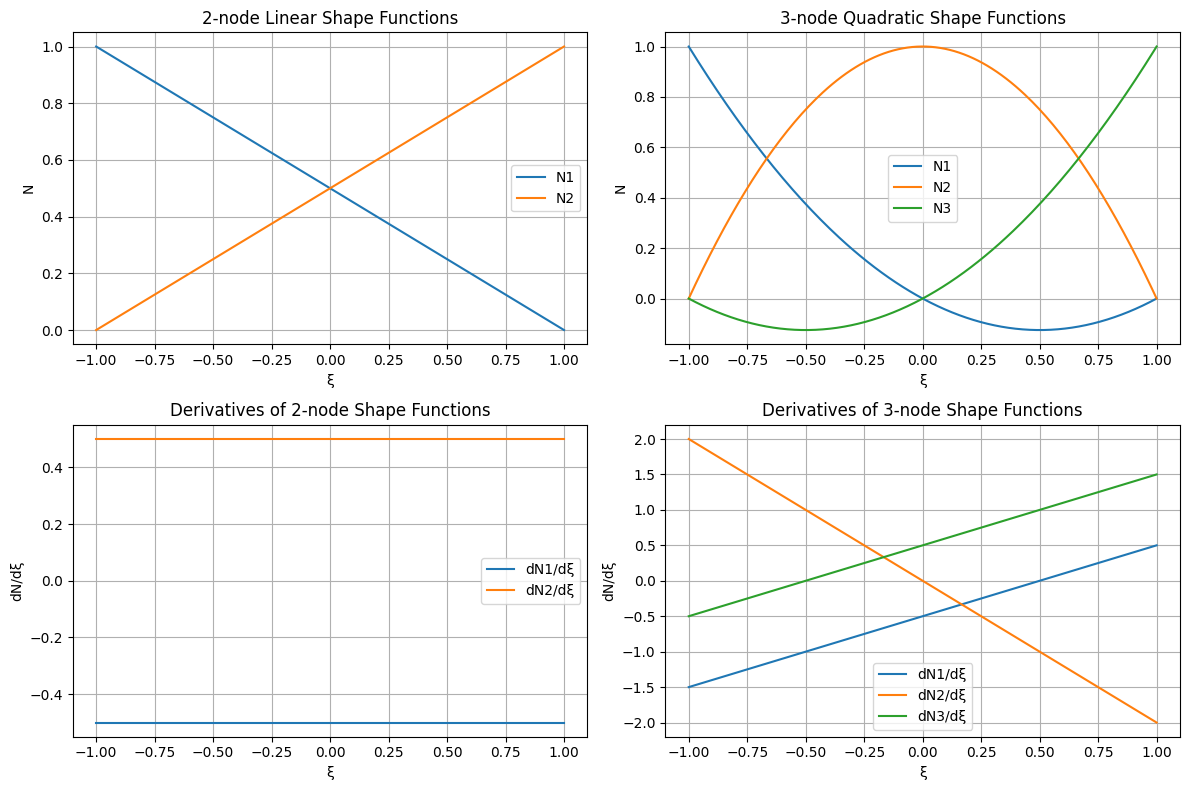

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def N1D(xi, nn):
    """
    Shape functions for 1D elements (2-node linear or 3-node quadratic)
    """
    if nn == 2:
        N = [(1 - xi) / 2, (1 + xi) / 2]
    elif nn == 3:
        N = [xi * (xi - 1) / 2, 1 - xi**2, xi * (xi + 1) / 2]
    else:
        raise ValueError("Only 2-node or 3-node elements supported")
    return N

def B1D(xi, nn):
    """
    Derivatives of 1D shape functions
    """
    if nn == 2:
        B = [-0.5, 0.5]
    elif nn == 3:
        B = [xi - 0.5, -2 * xi, xi + 0.5]
    else:
        raise ValueError("Only 2-node or 3-node elements supported")
    return B

# Key test points
test_points = [-1, 0, 1]

print("=== Shape Functions (N1D) ===")
for xi in test_points:
    print(f"xi = {xi: .1f}, 2-node: {N1D(xi, 2)}, 3-node: {N1D(xi, 3)}")

print("\n=== Derivatives (B1D) ===")
for xi in test_points:
    print(f"xi = {xi: .1f}, 2-node: {B1D(xi, 2)}, 3-node: {B1D(xi, 3)}")

# Sample for plots
xi_vals = np.linspace(-1, 1, 200)
N2 = np.array([N1D(xi, 2) for xi in xi_vals])
N3 = np.array([N1D(xi, 3) for xi in xi_vals])
B2 = np.array([B1D(xi, 2) for xi in xi_vals])
B3 = np.array([B1D(xi, 3) for xi in xi_vals])

# Plotting
plt.figure(figsize=(12, 8))

# Shape functions (2-node)
plt.subplot(2, 2, 1)
plt.plot(xi_vals, N2[:, 0], label="N1")
plt.plot(xi_vals, N2[:, 1], label="N2")
plt.title("2-node Linear Shape Functions")
plt.xlabel("ξ")
plt.ylabel("N")
plt.legend()
plt.grid(True)

# Shape functions (3-node)
plt.subplot(2, 2, 2)
plt.plot(xi_vals, N3[:, 0], label="N1")
plt.plot(xi_vals, N3[:, 1], label="N2")
plt.plot(xi_vals, N3[:, 2], label="N3")
plt.title("3-node Quadratic Shape Functions")
plt.xlabel("ξ")
plt.ylabel("N")
plt.legend()
plt.grid(True)

# Derivatives (2-node)
plt.subplot(2, 2, 3)
plt.plot(xi_vals, B2[:, 0], label="dN1/dξ")
plt.plot(xi_vals, B2[:, 1], label="dN2/dξ")
plt.title("Derivatives of 2-node Shape Functions")
plt.xlabel("ξ")
plt.ylabel("dN/dξ")
plt.legend()
plt.grid(True)

# Derivatives (3-node)
plt.subplot(2, 2, 4)
plt.plot(xi_vals, B3[:, 0], label="dN1/dξ")
plt.plot(xi_vals, B3[:, 1], label="dN2/dξ")
plt.plot(xi_vals, B3[:, 2], label="dN3/dξ")
plt.title("Derivatives of 3-node Shape Functions")
plt.xlabel("ξ")
plt.ylabel("dN/dξ")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
